In [1]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [3]:
#WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')

method = 'TR_IRGNM'
#dump_path = WORK_DIR / Path('examples/diffusion/dumps') / f'20250203_153616_TR_IRGNM'
dump_path = WORK_DIR / Path('experiments/test') / f'reaction_TR_100'

setup_path = dump_path / 'setup.pkl'
optimizer_parameter_path = dump_path / 'optimizer_parameter.pkl'
data_path = dump_path / f'{method}_final.pkl'
final_data_path = dump_path / f'{method}_final.pkl'

with open(setup_path, 'rb') as file:
    setup = load(file)

with open(optimizer_parameter_path, 'rb') as file:
    optimizer_parameter = load(file)

if not 'FOM' in locals():
    FOM = build_InstationaryModelIP(setup=setup)

q_exact = setup['model_parameter']['q_exact']

with open(data_path, 'rb') as file:
    data = load(file)


if final_data_path.exists():
    with open(final_data_path, 'rb') as file:
        final_data = load(file)

[2025-02-04 11:36:15,027][__init__] - Setting up InstationaryModelIP
[2025-02-04 11:36:15,932][discretize_instationary_IP] - noise percentage is 2.1203e-07
[2025-02-04 11:36:15,933][discretize_instationary_IP] - noise_level is 1.0000e-05
[2025-02-04 11:36:15,947][__init__] - Setting up InstationaryModelIP
[2025-02-04 11:36:15,947][__init__] - Setting up InstationaryModelIP


In [4]:
data

{'q': [NumpyVectorArray(NumpyVectorSpace(10201, id='PARAM'), [[3. 3. 3. ... 3. 3. 3.]], _len=1)],
 'alpha': [1e-05],
 'J': [1.0866323223826302e-05],
 'norm_nabla_J': [9.450385979953727e-06],
 'J_r': [1.0866323223814064e-05],
 'abs_est_error_J_r': [1.8840107636666448e-17],
 'rel_est_error_J_r': [1.7338070337699376e-12],
 'total_runtime': 3.0057768160040723,
 'stagnation_flag': False,
 'optimizer_parameter': {'method': 'TR_IRGNM',
  'q_0': array([[3., 3., 3., ..., 3., 3., 3.]]),
  'alpha_0': 1e-05,
  'tol': 0.005,
  'tau': 3.5,
  'noise_level': 1e-05,
  'theta': 0.4,
  'Theta': 1.95,
  'tau_tilde': 3.5,
  'i_max': 75,
  'reg_loop_max': 10,
  'i_max_inner': 2,
  'armijo_max_iter': 100,
  'lin_solver_parms': {'lin_solver_max_iter': 10000.0,
   'lin_solver_tol': 1e-12,
   'lin_solver_inital_step_size': 1},
  'use_cached_operators': True,
  'eta0': 0.1,
  'kappa_arm': 1e-12,
  'beta_1': 0.9999999999999999,
  'beta_2': 0.75,
  'beta_3': 0.5}}

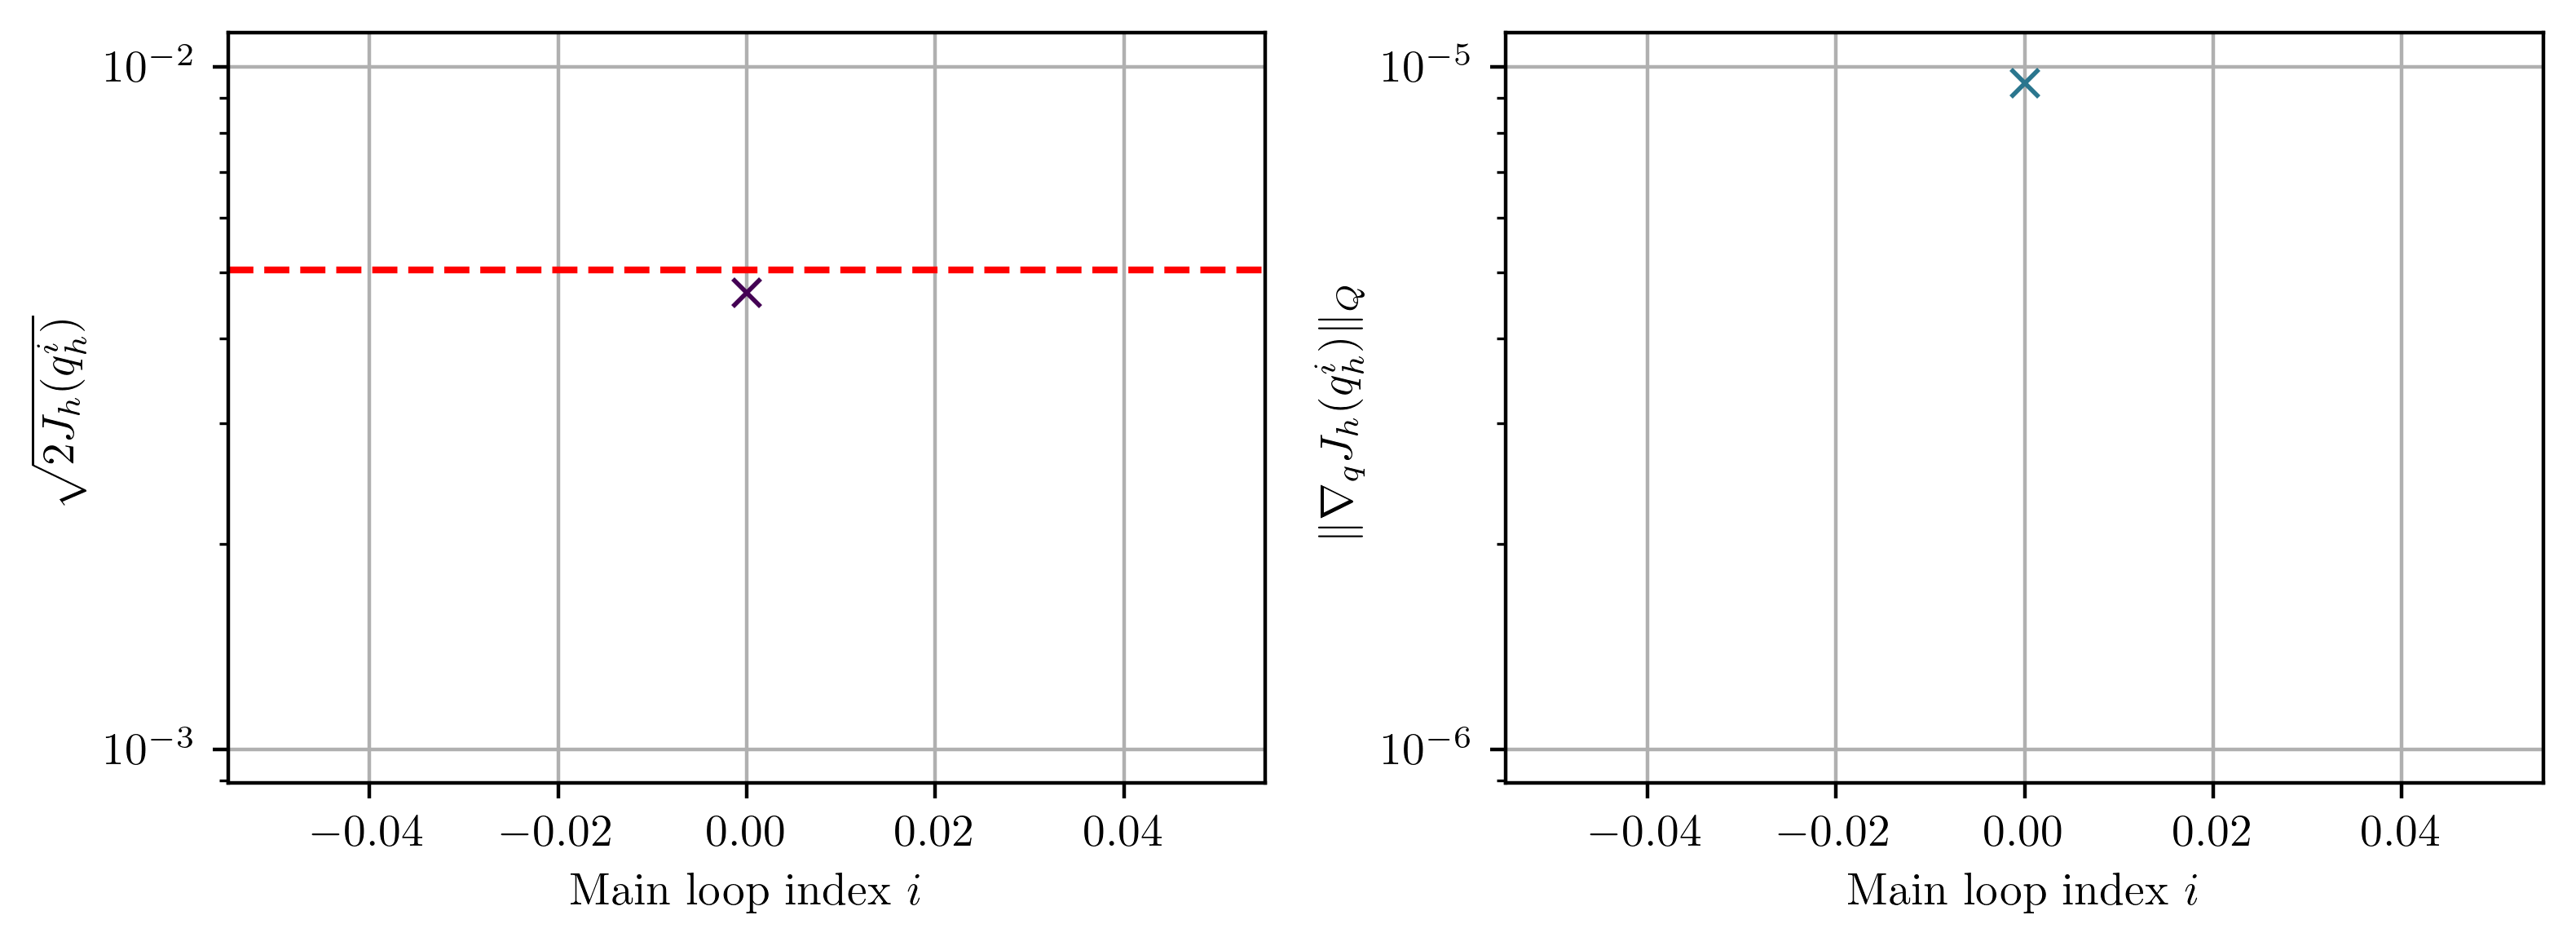

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
cmap = plt.get_cmap('viridis')

Js = np.array(data['J'])
norm_nabla_Js = np.array(data['norm_nabla_J'])
assert len(Js) == len(norm_nabla_Js)

ax[0].set_xlabel(r'$\textrm{Main loop index } i$')
ax[0].set_ylabel(r'$\sqrt{2J_h(q^i_h)}$')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].plot(np.sqrt(2 * Js), marker='x',color=cmap(0))

tau = optimizer_parameter['tau']
noise_level = optimizer_parameter['noise_level']
tol = optimizer_parameter['tol']
y = tau * noise_level + tol
ax[0].axhline(y=y, color='r', linestyle='--')


ax[1].set_xlabel(r'$\textrm{Main loop index } i$')
if setup['model_parameter']['q_time_dep']:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q^{K}}$')
else:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q}$')
    
ax[1].set_yscale('log')
ax[1].grid()
ax[1].plot(norm_nabla_Js, marker='x',color=cmap(100))
##############################


plt.tight_layout()
plt.show()

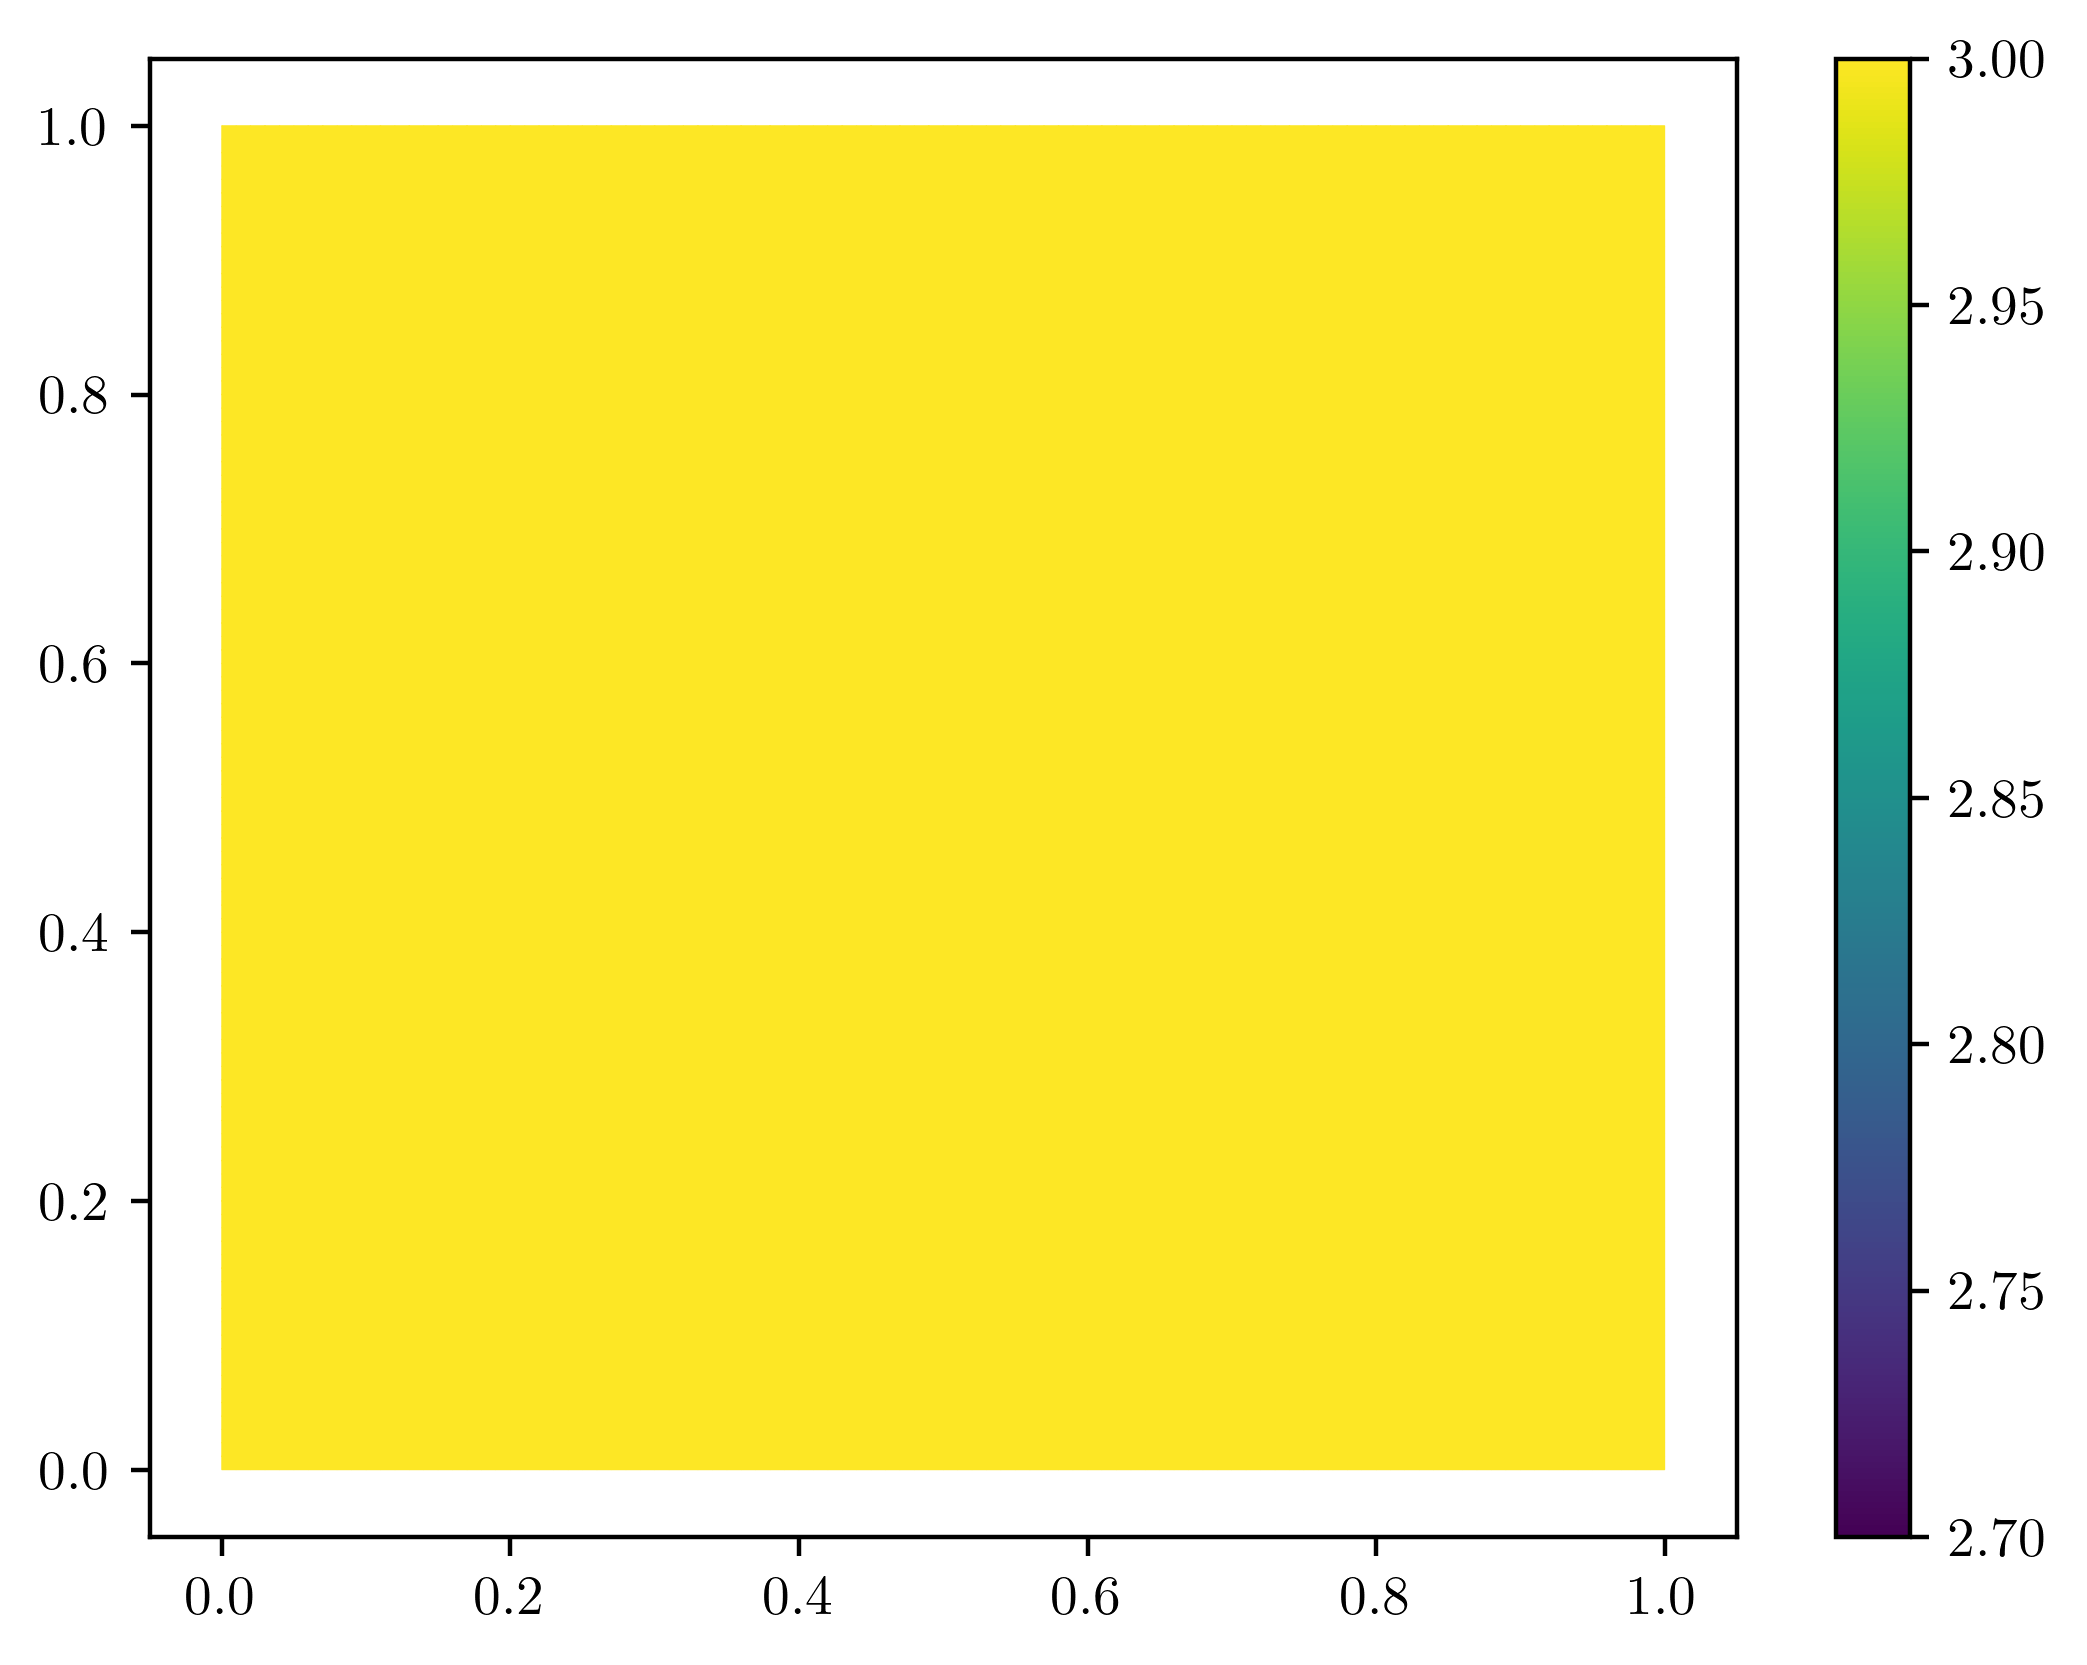

In [6]:
FOM.visualizer.visualize(data['q'][-1])